# Billionaire Dataset - Wealth Analysis

This notebook explores and understands the patterns of wealth concentration, inequality, and the relationships between wealth and various socioeconomic factors.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
from scipy.stats import f_oneway
import sys
import os
sys.path.append(os.path.abspath('..'))
from src.feature_engineering import create_features

## 1. Setup and Data Loading
Setting up visualizations style, display parameters, and loading data.

In [8]:
# Set visualization style
plt.style.use('ggplot')
sns.set_palette('Set2')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

# Load data
df = pd.read_csv('../data/processed/df_cleaned.csv')

# Apply feature engineering
df = create_features(df)

# Display basic structure about the dataset
print(f"Dataset shape: {df.shape}")
df.head()

Dataset shape: (2591, 31)


,position,wealth,industry,full_name,age,country_of_residence,city_of_residence,source,citizenship,gender,birth_date,last_name,first_name,residence_state,residence_region,birth_year,birth_month,birth_day,cpi_country,cpi_change_country,gdp_country,g_tertiary_ed_enroll,g_primary_ed_enroll,life_expectancy,tax_revenue,tax_rate,country_pop,country_lat,country_long,continent,age_group
0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,France,M,1949-03-05,Arnault,Bernard,No subdivisions info,No subdivisions info,1949,3,5,110.05,1.1,2715518274227,65.6,102.5,82.5,24.2,60.7,67059887,46.227638,2.213749,Europe,71-80
1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",United States,M,1971-06-28,Musk,Elon,Texas,South,1971,6,28,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America,51-60
2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,United States,M,1964-01-12,Bezos,Jeff,Washington,West,1964,1,12,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America,51-60
3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,United States,M,1944-08-17,Ellison,Larry,Hawaii,West,1944,8,17,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America,71-80
4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,United States,M,1930-08-30,Buffett,Warren,Nebraska,Midwest,1930,8,30,117.24,7.5,21427700000000,88.2,101.8,78.5,9.6,36.6,328239523,37.090240,-95.712891,North America,over 80


## 2. Basic Wealth Distribution Analysis
Analyzing and visualizing overall wealth distribution

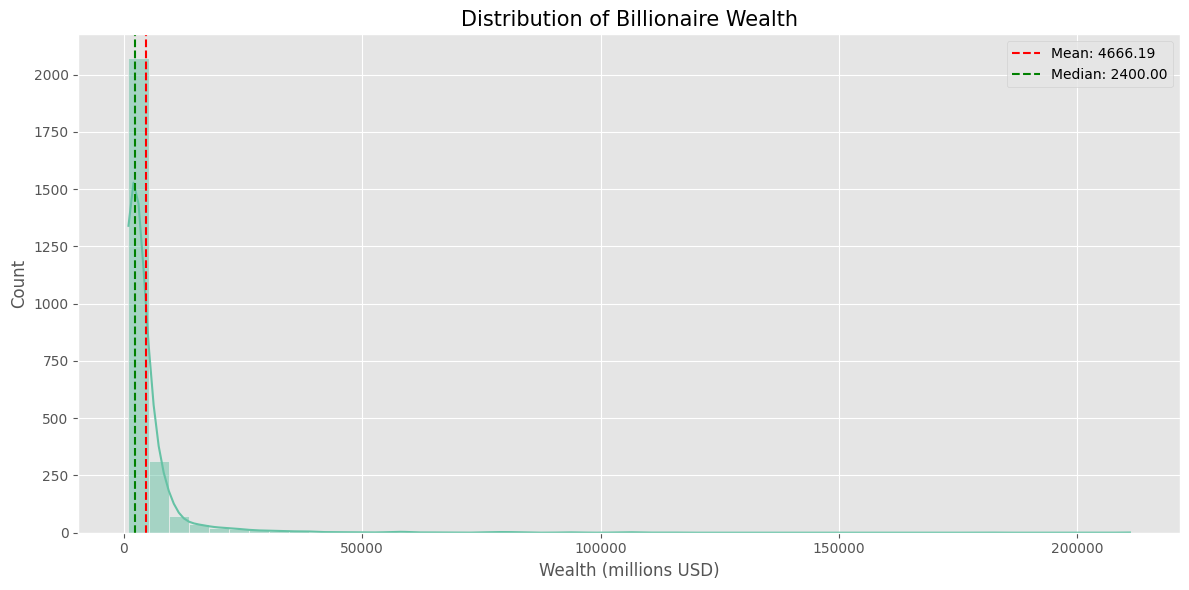

count      2591.000000
mean       4666.190660
std        9917.104258
min        1000.000000
25%        1500.000000
50%        2400.000000
75%        4300.000000
max      211000.000000
Name: wealth, dtype: float64

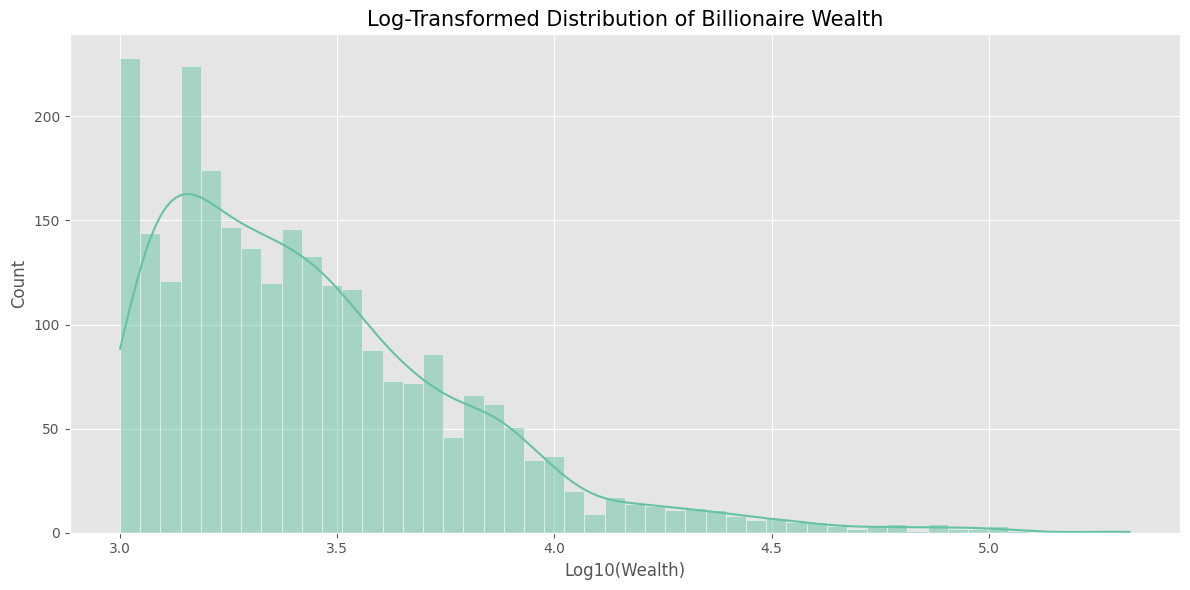

In [9]:
# Overview of wealth distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['wealth'], bins=50, kde=True)
plt.title('Distribution of Billionaire Wealth', fontsize=15)
plt.xlabel('Wealth (millions USD)')
plt.ylabel('Count')
plt.axvline(df['wealth'].mean(), color='red', linestyle='--', label=f'Mean: {df["wealth"].mean():.2f}')
plt.axvline(df['wealth'].median(), color='green', linestyle='--', label=f'Median: {df["wealth"].median():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics
wealth_stats = df['wealth'].describe()
display(wealth_stats)

# Log-transformed wealth distribution
plt.figure(figsize=(12, 6))
sns.histplot(np.log10(df['wealth']), bins=50, kde=True)
plt.title('Log-Transformed Distribution of Billionaire Wealth', fontsize=15)
plt.xlabel('Log10(Wealth)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()